# CNN

In [1]:
import os, shutil

original_dataset_dir = 'C:/CNN/train/train'

base_dir = 'C:/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)    

In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building the models

In [ ]:
from keras import layers
from keras import models
from keras import optimizers


#### Model1

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

C:\Users\alexs\AppData\Local\Temp\ipykernel_15384\3259228942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 49s 477ms/step - loss: 0.6910 - acc: 0.5510 - val_loss: 0.6701 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 27s 271ms/step - loss: 0.6626 - acc: 0.6090 - val_loss: 0.6395 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 28s 274ms/step - loss: 0.6142 - acc: 0.6720 - val_loss: 0.6085 - val_acc: 0.6720
Epoch 4/30
100/100 [==============================] - 28s 280ms/step - loss: 0.5716 - acc: 0.6975 - val_loss: 0.5996 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 29s 286ms/step - loss: 0.5324 - acc: 0.7340 - val_loss: 0.5937 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 30s 299ms/step - loss: 0.5036 - acc: 0.7510 - val_loss: 0.5951 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 29s 285ms/step - loss: 0.4869 - acc: 0.7750 - val_loss: 0.5773 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 2

In [11]:
model.save('cats_and_dogs_small_1.h5')

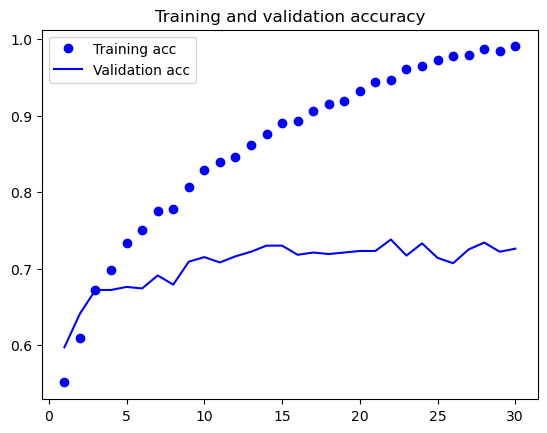

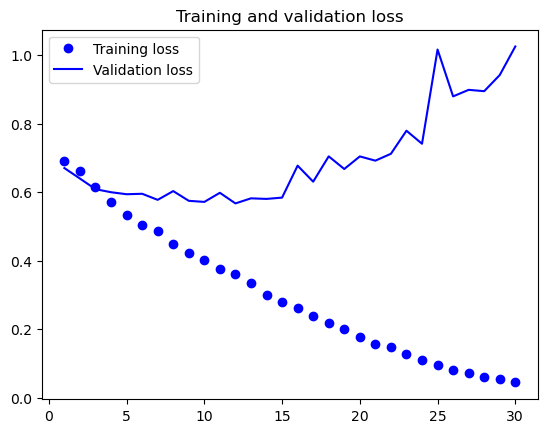

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

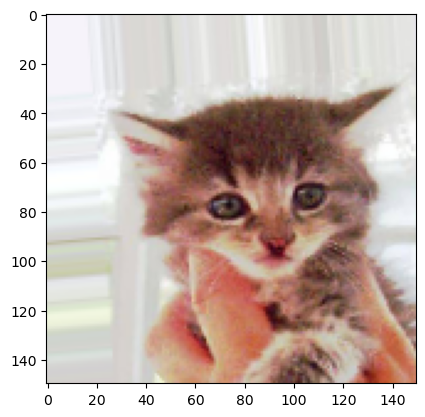

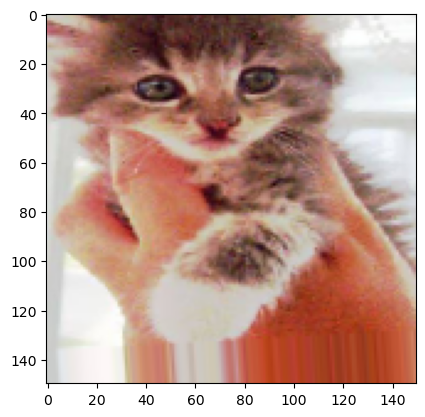

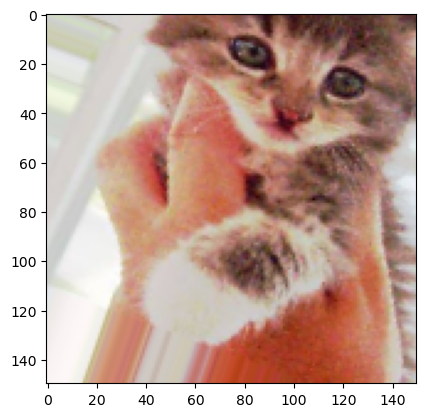

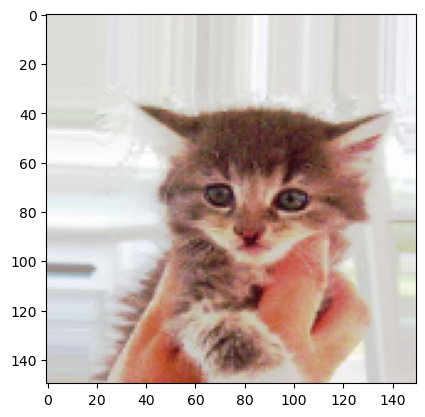

In [40]:
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [11]:
import os
base_dir = 'C:/CNN/train/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [21]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
from keras.preprocessing.image import ImageDataGenerator
#did not work with the values provided by the book

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      workers=12,
      steps_per_epoch=64, #had to modify this parameter.
      epochs=100,
      validation_data=validation_generator,
      validation_steps=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\alexs\AppData\Local\Temp\ipykernel_9204\3268193147.py:49: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
64/64 [==============================] - 28s 408ms/step - loss: 0.6952 - acc: 0.5256 - val_loss: 0.6930 - val_acc: 0.5080
Epoch 2/100
64/64 [==============================] - 32s 486ms/step - loss: 0.6849 - acc: 0.5527 - val_loss: 0.6695 - val_acc: 0.5970
Epoch 3/100
64/64 [==============================] - 28s 418ms/step - loss: 0.6751 - acc: 0.5851 - val_loss: 0.6570 - val_acc: 0.5870
Epoch 4/100
64/64 [==============================] - 27s 415ms/step - loss: 0.6599 - acc: 0.6004 - val_loss: 0.8178 - val_acc: 0.5030
Epoch 5/100
64/64 [==============================] - 28s 426ms/step - loss: 0.6543 - acc: 0.5901 - val_loss: 0.6304 - val_acc: 0.6380
Epoch 6/100
64/64 [==============================] - 27s 415ms/step - loss: 0.6369 - acc: 0.6280 - val_loss: 0.6553 - val_acc: 0.5950
Epoch 7/100
64/64 [==============================] - 31s 484ms/step - loss: 0.6255 - acc: 0.6373 - val_loss: 0.6120 - val_acc: 0.6460
Epoch 8/100
64/64 [==============================] - 28s 419ms

Epoch 62/100
64/64 [==============================] - 27s 416ms/step - loss: 0.4623 - acc: 0.7810 - val_loss: 0.4742 - val_acc: 0.7740
Epoch 63/100
64/64 [==============================] - 28s 422ms/step - loss: 0.4654 - acc: 0.7761 - val_loss: 0.4411 - val_acc: 0.7930
Epoch 64/100
64/64 [==============================] - 25s 381ms/step - loss: 0.4555 - acc: 0.7825 - val_loss: 0.4622 - val_acc: 0.7640
Epoch 65/100
64/64 [==============================] - 25s 378ms/step - loss: 0.4625 - acc: 0.7761 - val_loss: 0.4602 - val_acc: 0.7820
Epoch 66/100
64/64 [==============================] - 29s 454ms/step - loss: 0.4521 - acc: 0.7928 - val_loss: 0.4532 - val_acc: 0.7880
Epoch 67/100
64/64 [==============================] - 25s 381ms/step - loss: 0.4474 - acc: 0.7830 - val_loss: 0.4974 - val_acc: 0.7710
Epoch 68/100
64/64 [==============================] - 25s 379ms/step - loss: 0.4427 - acc: 0.7894 - val_loss: 0.4600 - val_acc: 0.7880
Epoch 69/100
64/64 [==============================] - 2

In [23]:
model.save('cats_and_dogs_small_2.h5')

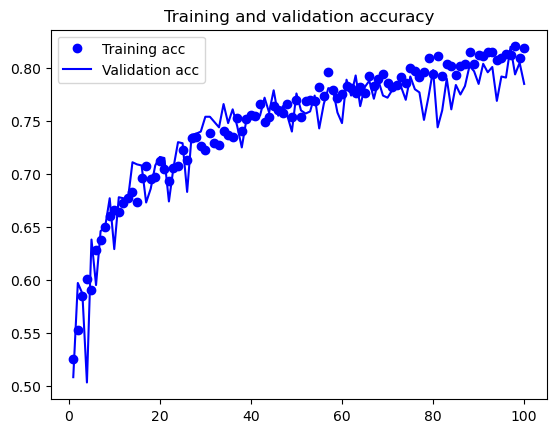

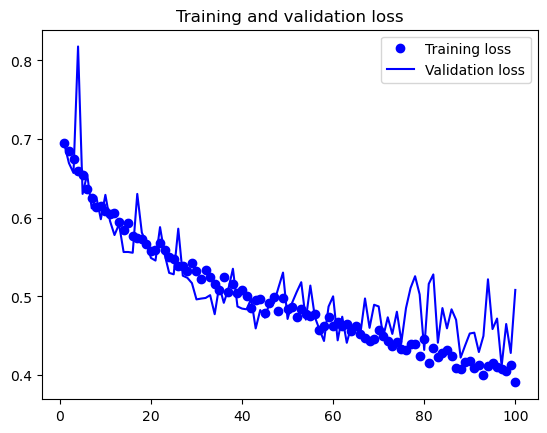

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()